**Problem Statement:**
    Predict the likelihood of passangers survival based on the data using decision trees.

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# There are some columns we don't need: nmae,
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
#add an average instead of Nan
# how many rows have naN value to age 

In [6]:
# nan_rows = len(df[df["Age"].isna()])
nan_rows = df[df["Age"].isna()]
df = df[df["Age"].notna()]
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


In [7]:
inputs=df.drop('Survived',axis=1)
target=df['Survived']

In [8]:
le_sex = LabelEncoder()

In [9]:
inputs['sex_n']= le_sex.fit_transform(inputs['Sex'])

In [10]:
inputs_n = inputs.drop(['Sex'],axis=1)
inputs_n.head()

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.3)

In [12]:
y_train

456    0
813    0
802    1
377    0
822    0
      ..
102    0
574    0
22     1
144    0
493    0
Name: Survived, Length: 499, dtype: int64

In [13]:
X_train

,Pclass,Age,Fare,sex_n
456,1,65.0,26.5500,1
813,3,6.0,31.2750,0
802,1,11.0,120.0000,1
377,1,27.0,211.5000,1
822,1,38.0,0.0000,1
...,...,...,...,...
102,1,21.0,77.2875,1
574,3,16.0,8.0500,1
22,3,15.0,8.0292,0
144,2,18.0,11.5000,1


In [14]:
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
model.score(X_test,y_test)

0.7953488372093023

In [17]:
model.predict([[3,29,7,1]]) #class is 3, age is 29, fare is 7,sex_1

array([1])

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [27]:
X_test.head(2)

,Pclass,Age,Fare,sex_n
263,1,40.0,0.0,1
861,2,21.0,11.5,1


In [26]:
act_pred = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})


In [22]:
from sklearn.metrics import confusion_matrix


In [24]:
cm = confusion_matrix(y_test,y_pred) # see L8 Multiclass Clssif
cm

array([[108,  27],
       [ 17,  63]])

Text(69.0, 0.5, 'Truth')

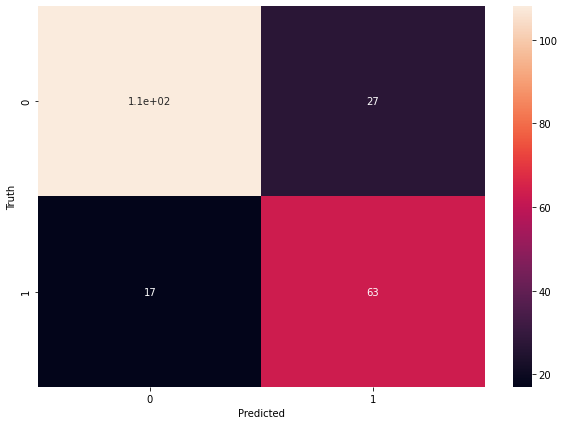

In [30]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
len(act_pred[act_pred.apply(lambda x: min(x) != max(x), 1)]) # this confirms 44 times they were not same

44

In [36]:
len(act_pred[act_pred.apply(lambda x: min(x) == max(x), 1)]) # this confirms 171 times they were same 


171

In [37]:
len(act_pred)


215